In [87]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


profiles = pd.read_csv('profiles.csv')
print(profiles.head())
print(profiles.drugs.value_counts())
print(profiles.smokes.value_counts())
print(profiles.drinks.value_counts())
print(profiles.sign.value_counts())

profiles['zodiac'] = profiles.sign.str.split().str.get(0)
'''print(profiles.zodiac.value_counts())
print(profiles.religion.value_counts())'''
profiles['belief'] = profiles.religion.str.split().str.get(0)
'''print(profiles.belief.value_counts())'''


   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

'print(profiles.belief.value_counts())'

In [12]:
selection = ['drugs', 'smokes', 'drinks', 'belief', 'diet', 'zodiac']
zodiac = profiles[selection].dropna()
'''zodiac.shape'''

#print(zodiac.columns)    
for i in selection[:-1]:
    zodiac = pd.get_dummies(zodiac, columns=[i], prefix=[i])

print(zodiac.head())
col_length = len(zodiac.columns)

X = zodiac.iloc[:, 1:col_length]
Y = zodiac.iloc[:, 0:1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

         zodiac  drugs_never  drugs_often  drugs_sometimes  smokes_no  \
0        gemini            1            0                0          0   
1        cancer            0            0                1          1   
7   sagittarius            1            0                0          1   
9        cancer            1            0                0          1   
11          leo            1            0                0          1   

    smokes_sometimes  smokes_trying to quit  smokes_when drinking  smokes_yes  \
0                  1                      0                     0           0   
1                  0                      0                     0           0   
7                  0                      0                     0           0   
9                  0                      0                     0           0   
11                 0                      0                     0           0   

    drinks_desperately  ...  diet_mostly vegetarian  diet_other  \
0      

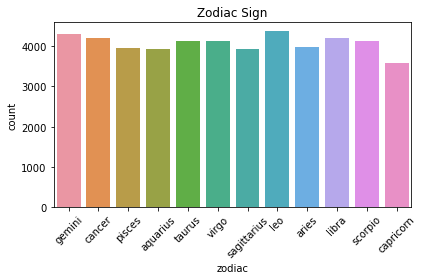

In [83]:
sns.countplot(data=profiles, x='zodiac')
plt.xticks(rotation=45)
plt.title('Zodiac Sign')
plt.tight_layout()
plt.savefig('signs.png')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

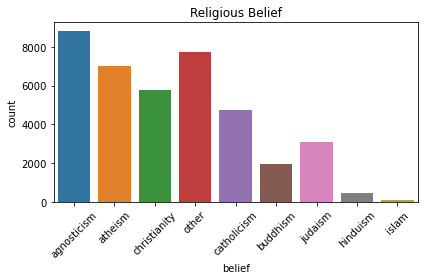

In [84]:
sns.countplot(data=profiles, x='belief')
plt.xticks(rotation=45)
plt.title('Religious Belief')
plt.tight_layout()
plt.savefig('belief.png')
plt.show

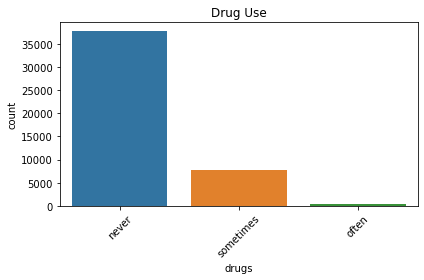

In [85]:
sns.countplot(data=profiles, x='drugs')
plt.xticks(rotation=45)
plt.title('Drug Use')
plt.tight_layout()
plt.savefig('drugs.png')
plt.show()

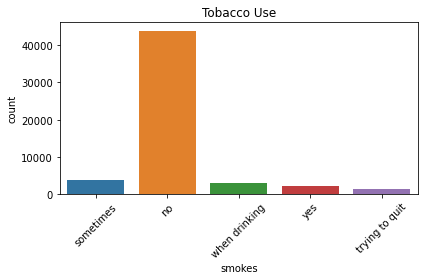

In [86]:
sns.countplot(data=profiles, x='smokes')
plt.xticks(rotation=45)
plt.title('Tobacco Use')
plt.tight_layout()
plt.savefig('smokes.png')
plt.show()

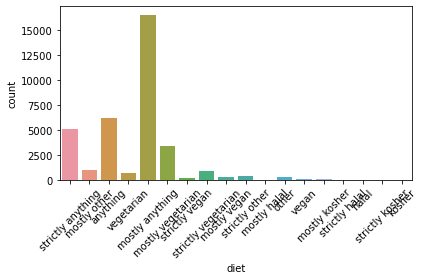

In [78]:
sns.countplot(data=profiles, x='diet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('diet.png')
plt.show()

In [13]:
lr_model = LogisticRegression(multi_class='multinomial')
lr_model.fit(x_train, y_train)
lr_predict = lr_model.predict(x_train)
print(classification_report(y_train, lr_predict))

              precision    recall  f1-score   support

    aquarius       0.09      0.02      0.03      1082
       aries       0.11      0.07      0.08      1158
      cancer       0.11      0.19      0.14      1227
   capricorn       0.11      0.10      0.10      1043
      gemini       0.10      0.27      0.14      1256
         leo       0.11      0.15      0.13      1225
       libra       0.12      0.09      0.10      1152
      pisces       0.09      0.02      0.03      1108
 sagittarius       0.15      0.01      0.03      1091
     scorpio       0.11      0.14      0.12      1163
      taurus       0.09      0.05      0.06      1171
       virgo       0.09      0.10      0.10      1190

    accuracy                           0.10     13866
   macro avg       0.11      0.10      0.09     13866
weighted avg       0.11      0.10      0.09     13866



In [50]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train, y_train)
knn_predict = knn_model.predict(x_train)
print(classification_report(y_train, knn_predict))

              precision    recall  f1-score   support

    aquarius       0.16      0.19      0.17      1082
       aries       0.12      0.28      0.17      1158
      cancer       0.20      0.14      0.16      1227
   capricorn       0.16      0.14      0.15      1043
      gemini       0.12      0.32      0.17      1256
         leo       0.18      0.16      0.17      1225
       libra       0.20      0.11      0.14      1152
      pisces       0.18      0.09      0.12      1108
 sagittarius       0.23      0.10      0.14      1091
     scorpio       0.14      0.12      0.13      1163
      taurus       0.18      0.10      0.13      1171
       virgo       0.24      0.08      0.12      1190

    accuracy                           0.15     13866
   macro avg       0.17      0.15      0.15     13866
weighted avg       0.17      0.15      0.15     13866



In [15]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
tree_predict = tree_model.predict(x_train)
print(classification_report(y_train, tree_predict))

              precision    recall  f1-score   support

    aquarius       0.29      0.27      0.28      1082
       aries       0.19      0.33      0.24      1158
      cancer       0.24      0.25      0.25      1227
   capricorn       0.18      0.28      0.22      1043
      gemini       0.19      0.30      0.24      1256
         leo       0.25      0.23      0.24      1225
       libra       0.24      0.22      0.23      1152
      pisces       0.34      0.16      0.22      1108
 sagittarius       0.34      0.15      0.21      1091
     scorpio       0.19      0.20      0.20      1163
      taurus       0.28      0.16      0.20      1171
       virgo       0.28      0.17      0.21      1190

    accuracy                           0.23     13866
   macro avg       0.25      0.23      0.23     13866
weighted avg       0.25      0.23      0.23     13866



In [16]:
from sklearn.metrics import confusion_matrix 
tree_cm = confusion_matrix(y_train, tree_predict)
tree_labels = tree_model.classes_

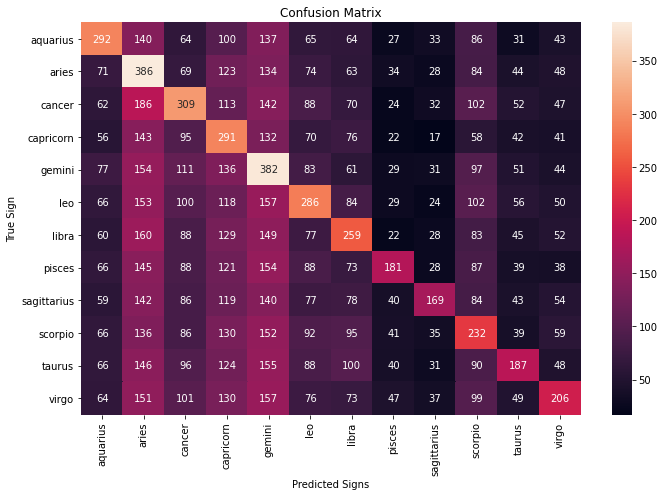

In [77]:
plt.figure(figsize=(10,7))
ax=plt.subplot()
sns.heatmap(tree_cm, annot=True, ax=ax, fmt='d')

ax.set_xlabel('Predicted Signs')
ax.set_ylabel('True Sign')
ax.set_title('Confusion Matrix')

ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(tree_labels)
ax.yaxis.set_ticklabels(tree_labels)
plt.tight_layout()
plt.savefig('confusion.png')

plt.show()